# Proyecto: Análisis del mercado inmobiliario de la Ciudad de Buenos Aires

Mentor: Javier Lezama.

javitolez@gmail.com

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal www.Properati.com.ar.

#### Autor:: Pablo Borja

# El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

#Los atributos

A continuación vamos a describir los atributos que consideramos en esta muestra:
* id: id de la propiedad
* created_on: fecha en la que la propiedad ingresó al sitio
* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

Objetivos del practico de análisis y curación:

El objetivo de este practico es trabajar con el mismo dateset trabajado en el practico uno y dejarlo curado, es decir limpiado, sin datos faltantes, para ya poder trabajarlo en los próximos prácticos, con una dateset curado con todas las instancias no nulas, hacer el adecuado análisis de las variables categóricas, etc.

# Manos a la obra

Dado que ya lo trabajamos en el proyecto anterior, en este caso trabajaremos solo con casas (house), departamentos (apartment) y PH (PH).


Se comienza leyendo el dataset original y se filtran las instancias que nos interesan.
Luego se analizan los tipos de columnas y se buscan los caracteres especiales en las columnas que sean de tipo String.

In [80]:
import pandas as pd

In [81]:
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('../Mentoria Analisis y Visualización de Datos/datos_properati.csv',
                 parse_dates=['created_on'], 
                 date_parser=date_parser)

In [82]:
df.dtypes

created_on                 datetime64[ns]
operation                          object
property_type                      object
place_with_parent_names            object
lat-lon                            object
lat                               float64
lon                               float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
floor                             float64
rooms                             float64
expenses                          float64
properati_url                      object
barrio                             object
comuna                            float64
dtype: object

# Caracteres especiales

Filtrar el dataset en busca de caracteres especiales, si los hay.

In [1]:
Cuando se tienen caracteres que no son reconocidos por el encoding por defecto,
hubiera habido algún error al crear el DataFrame.
Pero como o hubo ninguno, se puede inferir que los caracteres del dataset son legibles 
por lo que no se necesita un forma de parsearlo o corregirlos.
Sin embargo podría ser útil, revisar los nombres de las columnas para ver algún caracter extraño.

# Chequear si hay datos duplicados


Chequear que no hay datos duplicados, si los hay decidir que hacer con los mismos.

In [83]:
Se toma el punto de vista de que se va a buscar filas duplicadas.
Se va a utilizar la función de duplicated()
df.duplicated().sum()

0

# Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, próximos módulos, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

Codificar el label Barrio con ambas estrategias.

In [84]:
df_copy = df.copy()

In [85]:
# Usaremos los módulos de preprocesamiento de la libreria de scikitlearn.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [86]:
# Asociaremos cadena a número.
le = LabelEncoder()
df_copy['barrio'] = le.fit_transform(df_copy['barrio'])
df_copy.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,20,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,20,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,20,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,20,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,20,14.0


In [87]:
# Mostrar las clases del Label Encoder
le.classes_

array(['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
       'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES',
       'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS',
       'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUEZ', 'PALERMO',
       'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS',
       'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA',
       'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO',
       'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE',
       'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO',
       'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL',
       'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI',
       'VILLA URQUIZA'], dtype=object)

In [88]:
df_copy = pd.get_dummies(df, columns=['barrio'], prefix='barrio')

In [89]:
df_copy.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,...,0,0,0,0,0,0,0,0,0,0


# Outliers

Analicemos en primer lugar los valores extremos que puede haber en los precios y en las superficies. Esto nos va a ser útil para luego imputar usando medidas de tendencia central, como el promedio. Recordemos que las medidas de tendencia central pueden ser sensibles a outliers, por lo que la imputación de valores faltantes puede verse afectada
Una posible pregunta que surge es si conviene primero imputar faltantes y luego remover outliers, o lo contrario. Cuando se imputa se modifica la distribución de los datos. Por eso, las cotas que utilicemos para definir los outliers se verán afectadas por este cambio y modificarán los resultados finales. Entonces comenzaremos quitando outliers.
Vamos a trabajar con price_usd_per_m2. Precios altos pueden corresponderse con grandes superficies, por lo que conviene analizar juntos ambos atributos. Veamos la distribución de los valores y un boxplot para comenzar a identificar los outliers.

1) Utilizá seaborn para hacer un distplot del precio por metro cuadrado. 
Hacer un drop de los valores NaN de esta columna antes de graficar.

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

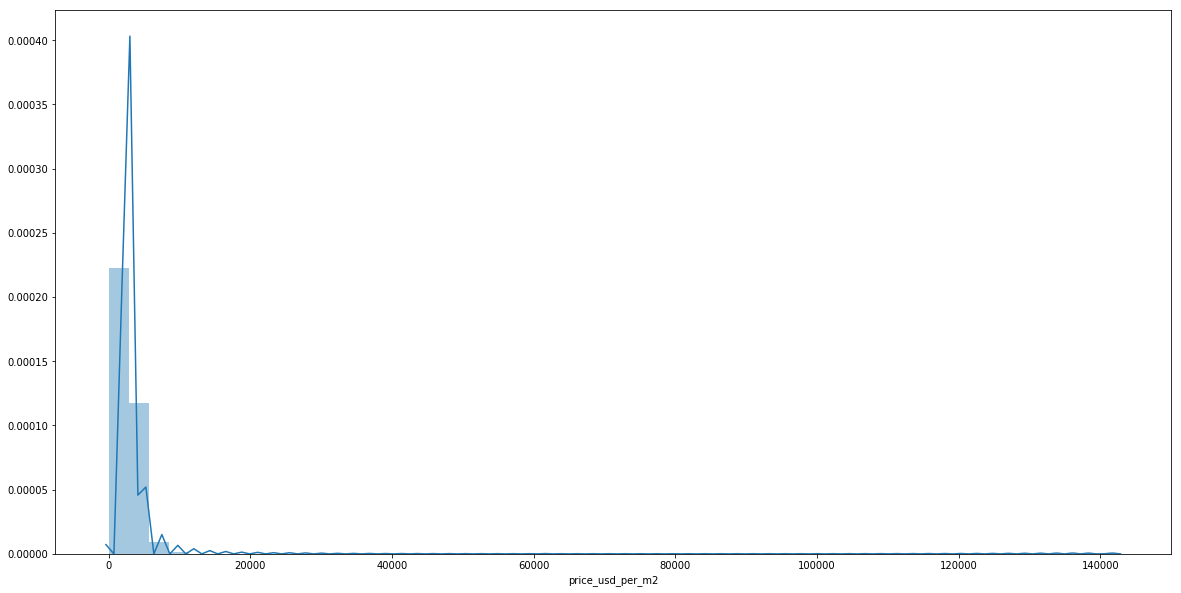

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
df_filtered = df.dropna(subset=['price_usd_per_m2'])
sns.distplot(df_filtered['price_usd_per_m2'], ax=ax)

2) Hacé un boxplot de la columna price_usd_per_m2

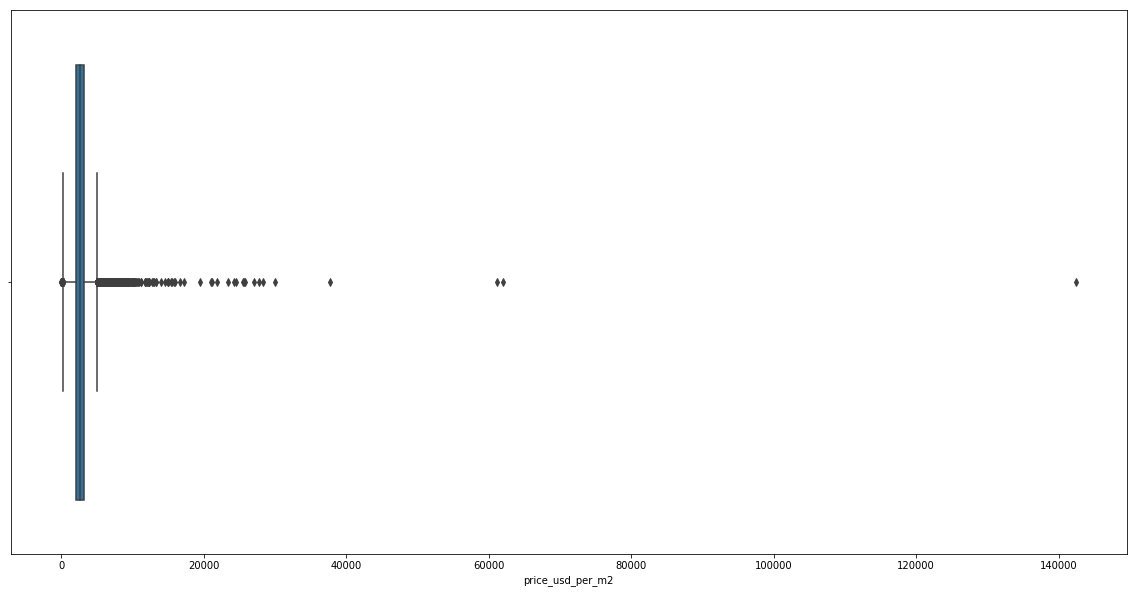

In [92]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=df_filtered['price_usd_per_m2'], ax=ax)

¿A qué conclusión podemos llegar observando estas figuras? Responder

In [52]:
# Respuesta
# Existen outliers que están afectando a los datos, algunos muy marcados.
# En la parte inferior de la distribucion parece haber valores con valor cero o muy cercanos. Probablemente sea
# algú tipo de error cuando se ingresaron los datos.
# Teniendo en cuenta a la parte superior, tambien existen una distribución muy alargada, pudiendose
# corresponder a superficies muy grandes o errores en la entrada de los datos.

Para confirmar la presencia de outliers vamos a utilizar los percentiles.

3) Describir la columna mostrando sus estadísticos

In [93]:
# Estadisticos
df_filtered['price_usd_per_m2'].describe()

count     16037.000000
mean       2760.408525
std        1940.153216
min           0.958333
25%        1984.126984
50%        2545.454545
75%        3162.790698
max      142450.141026
Name: price_usd_per_m2, dtype: float64

Estamos ante la presencia de valores extremos en ambas puntas de la distribución. Vamos a aplicar la técnica del rango intercuartílico para limpiarlos.

Para obtener el rango tenemos que calcular la diferencia entre el tercer y el primer percentil. Luego en base a esto calcularemos los valores mínimos y máximos para definir qué observaciones serán descartadas.

4) Aplicar la técnica del rango intercuartílico para limpiar el precio por metro cuadrado. El resultado deberá ser un dataframe llamado df_filtered sin los outliers.

In [94]:
first_quartile = df_filtered['price_usd_per_m2'].quantile(q=0.25)
third_quartile = df_filtered['price_usd_per_m2'].quantile(q=0.75)
interquartile_range = third_quartile - first_quartile

In [95]:
lower_bound = first_quartile - 1.5 * interquartile_range
upper_bound = third_quartile + 1.5 * interquartile_range

In [96]:
df_filtered = df_filtered[(df_filtered['price_usd_per_m2'] > lower_bound) & 
                          (df_filtered['price_usd_per_m2'] < upper_bound)]

5) Volver a plotear con distplot y boxplot los precios sin los outliers y observá las diferencias con los anteriores ploteo.

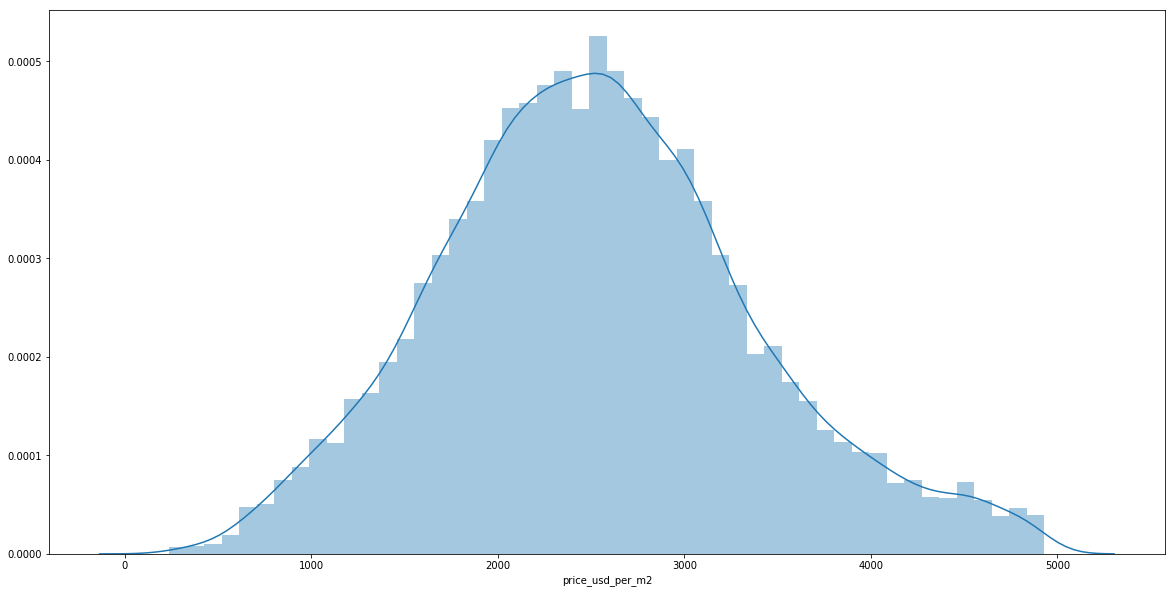

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df_filtered['price_usd_per_m2'], ax=ax)

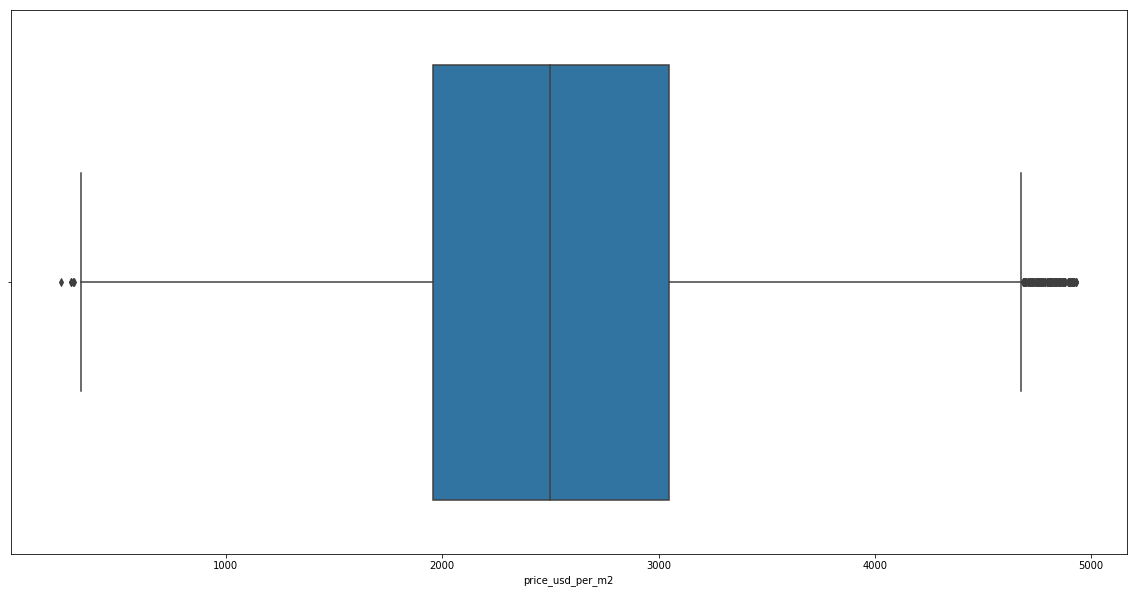

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=df_filtered['price_usd_per_m2'], ax=ax)

6) Describir nuevamente la columna mostrando sus estadísticos.

In [99]:
df_filtered['price_usd_per_m2'].describe()

count    15131.000000
mean      2528.832243
std        847.113710
min        239.726027
25%       1956.521739
50%       2500.000000
75%       3046.153846
max       4929.577465
Name: price_usd_per_m2, dtype: float64

Vamos a seguir trabajando con el dataframe filtrado

# Valores Faltantes

A diferencia del proyecto pasado, vamos a intentar imputar los valores faltantes para los atributos que consideramos importantes para el mercado inmobiliario. 

Estos atributos son los que informan superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado. 
Veamos en primer lugar cuántos valores faltantes tiene cada atributo. Nos interesa verlo como un porcentaje en relación a la cantidad de observaciones. Si un atributo tiene un elevado porcentaje de faltantes, puede ser mejor no considerarlo en el análisis.

Mostrar cual es el porcentaje de valores faltantes para cada columna.

In [100]:
df_missing_values = df_filtered.copy()

In [101]:
df_missing_values.isna().sum()/df_missing_values.shape[0]*100

created_on                  0.000000
operation                   0.000000
property_type               0.000000
place_with_parent_names     0.000000
lat-lon                     0.000000
lat                         0.000000
lon                         0.000000
price_aprox_usd             0.000000
surface_total_in_m2         0.000000
surface_covered_in_m2       3.866235
price_usd_per_m2            0.000000
floor                      83.722160
rooms                      22.642258
expenses                   78.421783
properati_url               0.000000
barrio                      0.000000
comuna                      0.000000
dtype: float64

Analizar y justificar que componente descartarían o no y porque. De quitarlos analizar si hay algún patrón para poder evitar quitarlos.

In [ ]:
Los atributos Floor y Expenses tienen muchos valores nulos, estas columnas no nos están aportando
de información. Por lo que sería conveniente borrar estas columnas.
# Agregar el tema de la dependencia de las columnas de pricing y surface, ademas de de la posbilidad 
# de poder chequear inconsistencias lógicas con surface covered y total.

# Imputación de datos

Podemos ver en los resultados que los atributos floor y expenses tienen un elevado porcentaje de faltantes. Una opción sería descartar estas columnas en el análisis. Si elimináramos las observaciones (filas) asociadas a estos, apoximadamente el 80% de los datos, mermando demasiado el conjunto de datos.
Otra opción sería por ejemplo considerar categorías como faltantes o no faltantes o en todo caso analizar si hay algún patrón para poder evitar quitarlos. 
Para avanzar con el proyecto, vamos a quitar esos atributos.

In [102]:
df_missing_values.drop(columns=['floor', 'expenses'], axis=1, inplace=True)

Analicemos estrategias para imputar los valores faltantes para los atributos rooms, surface_total_in_m2 y surface_covered_in_m2. Decidir qué estrategia tomar y realizar la imputación de los mismos.

In [103]:
# Para los atributos de suface su puede imputar los valores faltantes con el promedio. Sería la técnica más sencilla.
from sklearn.impute import SimpleImputer
import numpy as np

In [104]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [105]:
df_missing_values['surface_covered_in_m2'] = imp.fit_transform(df_missing_values[['surface_covered_in_m2']])

In [106]:
df_missing_values['surface_total_in_m2'] = imp.fit_transform(df_missing_values[['surface_total_in_m2']])

In [107]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')

In [108]:
df_missing_values['rooms'] = imp2.fit_transform(df_missing_values[['rooms']])

Una de las limitaciones que presenta los tipo de imputación es que provoca estimaciones sesgadas de la varianza. Esto impacta en los errores estandar y, por ende, en los tests estadístcos.

Este tipo de técnicas es útil cuando los valores son completamente al azar. Chequear si ha sucedido esto según la estrategia utilizada en el punto anterior.

In [109]:
# Se chequea que no haya algún otro nan.
df_missing_values.isna().sum()

created_on                 0
operation                  0
property_type              0
place_with_parent_names    0
lat-lon                    0
lat                        0
lon                        0
price_aprox_usd            0
surface_total_in_m2        0
surface_covered_in_m2      0
price_usd_per_m2           0
rooms                      0
properati_url              0
barrio                     0
comuna                     0
dtype: int64

In [110]:
df_missing_values.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna
count,15131.000000,15131.000000,1.513100e+04,15131.000000,15131.000000,15131.000000,15131.000000,15131.000000
mean,-34.599881,-58.434942,2.565434e+05,111.570154,98.677368,2528.832243,3.004098,8.014738
std,0.025862,0.039045,2.678539e+05,153.243359,228.599470,847.113710,1.540374,5.006154
min,-34.694841,-58.529858,9.862450e+03,10.000000,1.000000,239.726027,1.000000,1.000000
25%,-34.618980,-58.463133,1.190000e+05,47.000000,43.000000,1956.521739,2.000000,3.000000
50%,-34.599920,-58.434414,1.750000e+05,73.000000,67.000000,2500.000000,3.000000,7.000000
75%,-34.582165,-58.402333,2.950000e+05,126.000000,105.000000,3046.153846,4.000000,13.000000
max,-34.534315,-58.353227,4.700000e+06,9874.000000,22518.000000,4929.577465,34.000000,15.000000


# Variables binarias

### Generar variables binarias para el atributo property_type.

Hay que tener en cuenta en este caso que el atributo es categórico.

Para hacerlo usando scikit-learn, por como vienen dados los valores (en formato string), primero conviene convertirlos en numéricos. Para esto usamos LabelEncoder.

10) Convertí las variables de property_type utilizando LabelEncoder

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
le = LabelEncoder()
df_missing_values['property_type'] = le.fit_transform(df_missing_values['property_type'])

11) Mostrar las clases del LabelEncoder:

In [144]:
le.classes_

array([0, 1, 2, 3])

Luego con OneHotEncoder obtenemos las categorías expresadas como variables binarias. 

12) Aplicar OneHotEncoder sobre las variables categóricas para crear un dataframe categoricals_df

In [145]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
df_missing_values.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio,comuna
2,2017-08-02,sell,3,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.000000,2811.475410,2.0,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0
5,2017-08-09,sell,3,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.000000,4000.000000,3.0,https://www.properati.com.ar/1cw7a_venta_local...,PALERMO,14.0
6,2017-08-11,sell,3,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,98.677368,3846.153846,3.0,https://www.properati.com.ar/1d36i_venta_local...,PALERMO,14.0
8,2017-08-12,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.0,48.0,48.000000,2291.666667,3.0,https://www.properati.com.ar/1d5sl_venta_local...,PALERMO,14.0
9,2017-08-15,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.0,20.0,20.000000,2500.000000,3.0,https://www.properati.com.ar/1d86m_venta_local...,PALERMO,14.0


In [147]:
ohe = OneHotEncoder(sparse=False)
X = df_missing_values[['property_type', 'barrio']]

In [148]:
ohe.fit(X)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [149]:
X_transform = ohe.transform(X)

In [150]:
ohe.categories_

[array([0, 1, 2, 3], dtype=object),
 array(['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
        'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES',
        'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS',
        'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUEZ', 'PALERMO',
        'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS',
        'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA',
        'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO',
        'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE',
        'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO',
        'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL',
        'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI',
        'VILLA URQUIZA'], dtype=object)]

In [154]:
# X_transform = pd.DataFrame(X_transform, index=df_missing_values.index)
X_transform = pd.DataFrame(X_transform)

In [157]:
X_transform.columns = ohe.get_feature_names()

In [158]:
X_transform.head()

,x0_0,x0_1,x0_2,x0_3,x1_AGRONOMIA,x1_ALMAGRO,x1_BALVANERA,x1_BARRACAS,x1_BELGRANO,x1_BOCA,...,x1_VILLA GRAL. MITRE,x1_VILLA LUGANO,x1_VILLA LURO,x1_VILLA ORTUZAR,x1_VILLA PUEYRREDON,x1_VILLA REAL,x1_VILLA RIACHUELO,x1_VILLA SANTA RITA,x1_VILLA SOLDATI,x1_VILLA URQUIZA
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df_missing_values.reset_index(drop=True, inplace=True)
X_transform.reset_index(drop=True, inplace=True)

In [160]:
df_union = pd.concat([df_missing_values, X_transform], axis=1)

In [58]:
df_union.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio,comuna,0,1,2,3
0,2017-08-02,sell,3,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.000000,2811.475410,2.0,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0,0.0,0.0,0.0,1.0
1,2017-08-09,sell,3,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.000000,4000.000000,3.0,https://www.properati.com.ar/1cw7a_venta_local...,PALERMO,14.0,0.0,0.0,0.0,1.0
2,2017-08-11,sell,3,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,98.677368,3846.153846,3.0,https://www.properati.com.ar/1d36i_venta_local...,PALERMO,14.0,0.0,0.0,0.0,1.0
3,2017-08-12,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.0,48.0,48.000000,2291.666667,3.0,https://www.properati.com.ar/1d5sl_venta_local...,PALERMO,14.0,0.0,0.0,0.0,1.0
4,2017-08-15,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.0,20.0,20.000000,2500.000000,3.0,https://www.properati.com.ar/1d86m_venta_local...,PALERMO,14.0,0.0,0.0,0.0,1.0


Unir el nuevo dataframe categorical_df con el dataframe original df. Observación, necesitamos que tengan el mismo índice.

# Variables calculadas

### Calcular el precio por metro cuadrado (precio/superficie total). Llamar a este atributo price_m2.

Calcular el precio por metro cuadrado (precio/superficie total). Llamar a este atributo price_m2.

Hay que tener cuidado en esta parte respecto de dividir por cero. Para ello, armemos una función de división que contemple eso.

El hecho de crear una columna nueva y no imputar los faltantes es simplemente una decisión. Cuando veamos modelos predictivos, vamos a poder cuantificar el costo de las decisiones que tomemos en términos de performance del modelo.

In [162]:
# Se crea la función para la nueva columna.
def price_m2(row):
    if row['surface_total_in_m2'] == 0:
        return 0
    else:
        return row['price_aprox_usd']/row['surface_total_in_m2']


In [163]:
df_union['price_m2'] = df_union.apply(lambda row: price_m2(row), axis=1)

In [164]:
df_union.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,x1_VILLA LUGANO,x1_VILLA LURO,x1_VILLA ORTUZAR,x1_VILLA PUEYRREDON,x1_VILLA REAL,x1_VILLA RIACHUELO,x1_VILLA SANTA RITA,x1_VILLA SOLDATI,x1_VILLA URQUIZA,price_m2
0,2017-08-02,sell,3,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2811.475410
1,2017-08-09,sell,3,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.000000
2,2017-08-11,sell,3,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,98.677368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3846.153846
3,2017-08-12,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.0,48.0,48.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2291.666667
4,2017-08-15,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.0,20.0,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.000000


In [165]:
# Se escribe en un archivo para seguir trabajando en los prácticos subsiguientes.
df_union.to_csv("df_filtered.csv", header=True, index=False)

### Verificar que ya no quedan atributos con valores faltantes

Verificar que ya no quedan atributos con valores faltantes.

¿Cuál fue el costo de dicho procedimiento? ¿Cuantas observaciones fueron descartadas? ¿Que porcentaje representa? 



In [167]:
df_union.isna().sum()

created_on                 0
operation                  0
property_type              0
place_with_parent_names    0
lat-lon                    0
lat                        0
lon                        0
price_aprox_usd            0
surface_total_in_m2        0
surface_covered_in_m2      0
price_usd_per_m2           0
rooms                      0
properati_url              0
barrio                     0
comuna                     0
x0_0                       0
x0_1                       0
x0_2                       0
x0_3                       0
x1_AGRONOMIA               0
x1_ALMAGRO                 0
x1_BALVANERA               0
x1_BARRACAS                0
x1_BELGRANO                0
x1_BOCA                    0
x1_BOEDO                   0
x1_CABALLITO               0
x1_CHACARITA               0
x1_COGHLAN                 0
x1_COLEGIALES              0
                          ..
x1_NUEZ                    0
x1_PALERMO                 0
x1_PARQUE AVELLANEDA       0
x1_PARQUE CHAC

In [168]:
# Instancias descartadas.
deleted_obs =  df.shape[0] - df_union.shape[0]
print("Se descartaron {0} observaciones.".format(deleted_obs))

Se descartaron 3848 observaciones.


In [169]:
# Porcentage de observaciones descartadas
print ("Esto representa el {0:.2f} %".format(df.shape[0] / deleted_obs))

Esto representa el 4.93 %


# Informe final

Presentar un informe final con los datos inferidos del dataset utilizando herramientas gráficas y escritas teniendo en cuenta los destinatarios. En este caso colegas de la diplomatura para preparar el informe con un background adecuado al destinatario.

In [ ]:
# INFORME ESCRITO
#
# En un primer paso se intentó verfiicar si habia lgún tipo de caracter extraño en el dataset.
# pero como bien se explica en la celda correspondiente a ese punto, se concluye que no hay.
# También se realizó una análisis para detectar datos duplicados, no se encuentra tampoco algún duplicado.
# con respecto a los valores extremos se pudo comprobar a través de un boxplot y un distplot que había bastantes 
# outliers, y algunos con valores muy por encima de los demas.
# Aplicando la técnica del rango inter-cuartílico se filtran estos datos y se vuelve a graficar los mismos,
# esta vez comprobando que las gráficas muestran uns distribución cercana a la normal.
# A continueación se trabajó cobre los datos faltantes, aquellos que se sabian que no eran importantes por 
# experiencia, fueron elimimados del dataset.Y los otros fueron imputados ya sea con la media, si  eran variables 
# continuas o con la mediana si eran datos categóricos.
# Con respecto a las variables binarias, se computó las variables categóricas para pasarlas a binarias, ya que
# como bien se menciona en el práctico, algunos algoritmos de ML no reconocen variables que no sean numéricas.
# por lo que es recomendable transformarlas en dicho tipo para poder procesarlas.
# Luego, se pudo comprabar que ya no quedaban atributos con valores nulos.
# Además se calculó que se eliminaron alrededor de 5% de los datos.